# **Exploratory Data Analysis Lab**


## Objectives


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

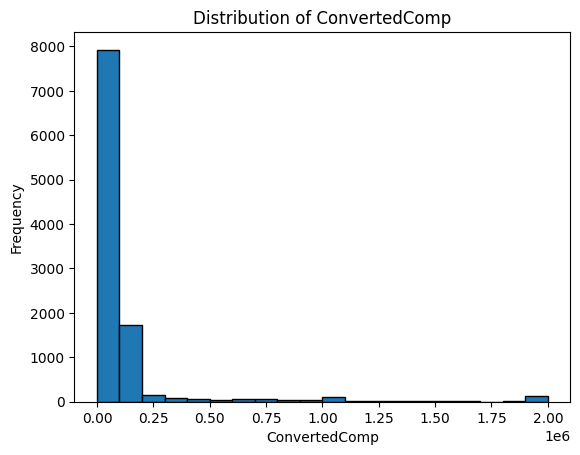

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

plt.hist(df['ConvertedComp'], bins=20, edgecolor='black')
plt.xlabel("ConvertedComp")
plt.ylabel('Frequency')
plt.title(f'Distribution of {"ConvertedComp"}')
plt.show()

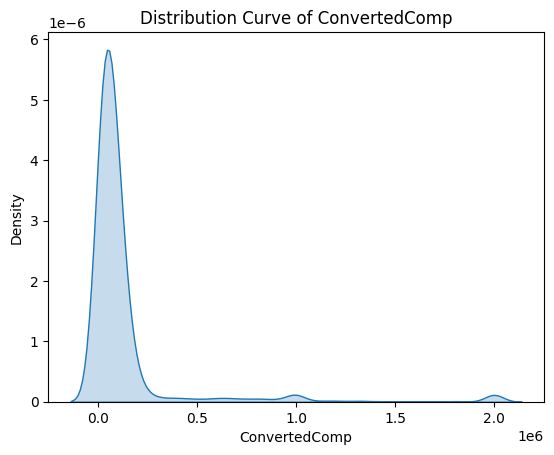

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.kdeplot(df["ConvertedComp"], fill=True)
plt.xlabel("ConvertedComp")
plt.ylabel('Density')
plt.title(f'Distribution Curve of {"ConvertedComp"}')
plt.show()

## Distribution


What is the median of the column `ConvertedComp`?


In [11]:
df['ConvertedComp'].mean().round()


131597.0

In [13]:
df['Gender'].value_counts()

Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [17]:
woman=df[df['Gender']=="Woman"]

In [20]:
woman['ConvertedComp'].mean().round()

101103.0

Give the five number summary for the column `Age`?


In [22]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


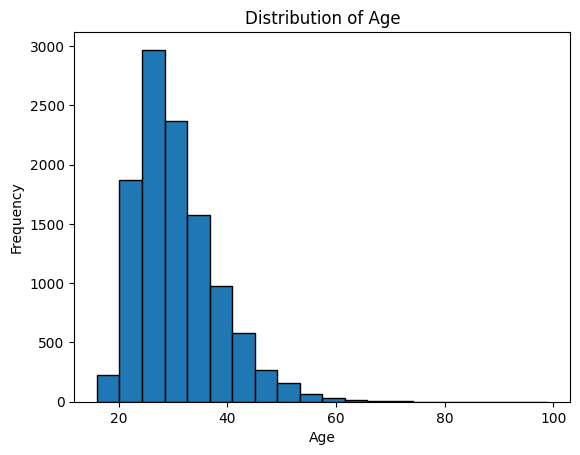

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

plt.hist(df['Age'], bins=20, edgecolor='black')
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.title(f'Distribution of {"Age"}')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


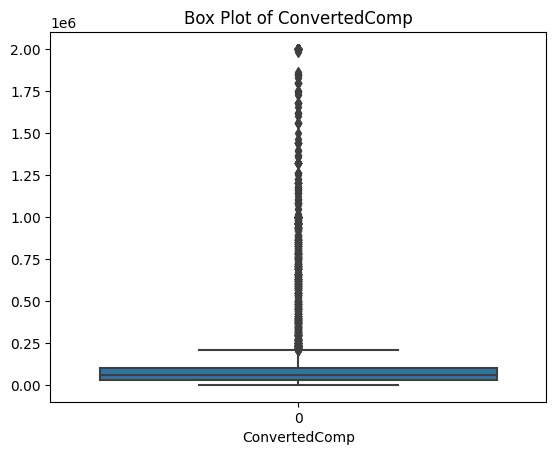

In [24]:
sns.boxplot(data=df["ConvertedComp"])
plt.xlabel("ConvertedComp")
plt.title(f'Box Plot of {"ConvertedComp"}')
plt.show()

In [30]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 =  df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print("Q1:", Q1, "Q3:", Q3, "IQR:", IQR)


Q1: 26868.0 Q3: 100000.0 IQR: 73132.0


Find out the upper and lower bounds.


In [32]:
Lower=Q1-1.5*IQR
Upper=Q3+1.5*IQR
print('Lower=',Lower,"Upper=",Upper)

Lower= -82830.0 Upper= 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [35]:
outliers = df[(df['ConvertedComp'] < Lower) | ( df['ConvertedComp'] > Upper)]
outliers


,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
13,32,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,Associate degree,"Information systems, information technology, o...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Indu...,21.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
45,100,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,Canada,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,39.0,Woman,No,Bisexual,White or of European descent,No,Appropriate in length,Easy
46,102,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,37.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Easy
60,128,"I am not primarily a developer, but I write co...",Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United Kingdom,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,30.0,Man,No,Bisexual,White or of European descent,Yes,Too long,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11296,24915,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Another engineering discipline (ex. civil, ele...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,27.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Neither easy nor difficult
11303,24931,I am a developer by profession,No,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Switzerland,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Somewhat less welcome now than last year,Tech articles written by other developers;Indu...,45.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
11350,25036,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","A business discipline (ex. accounting, finance...",...,Just as welcome now as I felt last year,NaN,48.0,Man,No,Straight / Heterosexual,White or of European descent,No,Too long,Neither easy nor difficult
11353,25047,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,39.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropria

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [41]:
df_non_outlier=df[~((df['ConvertedComp'] <Lower) | ( df['ConvertedComp'] >Upper))]
df_non_outlier

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,31.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,Yes,Too long,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11393,25136,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Cour...,36.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Difficult
11394,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Tech...,25.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
11395,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Indu...,34.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Easy
11396,25141,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Switzerland,No,"Secondary school (e.g. American high school, G...",NaN,...,Somewhat l

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              11398 non-null  int64  
 1   MainBranch              11398 non-null  object 
 2   Hobbyist                11398 non-null  object 
 3   OpenSourcer             11398 non-null  object 
 4   OpenSource              11317 non-null  object 
 5   Employment              11398 non-null  object 
 6   Country                 11398 non-null  object 
 7   Student                 11347 non-null  object 
 8   EdLevel                 11286 non-null  object 
 9   UndergradMajor          10661 non-null  object 
 10  EduOther                11234 non-null  object 
 11  OrgSize                 11302 non-null  object 
 12  DevType                 11333 non-null  object 
 13  YearsCode               11389 non-null  object 
 14  Age1stCode              11385 non-null

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [50]:
numeric_columns = df.select_dtypes(include='number')
correlations = numeric_columns.corrwith(df['Age'])
print("Correlation between 'Age' and other numerical columns:")
print(correlations)



Correlation between 'Age' and other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
dtype: float64
